# Adding an arrow when stroking a path

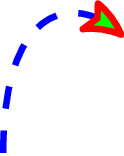

In [1]:
from pyx import *

c = canvas.canvas()
c.stroke(path.curve(0, 0, 0, 4, 2, 4, 3, 3),
         [style.linewidth.THICK, style.linestyle.dashed, color.rgb.blue,
          deco.earrow([deco.stroked([color.rgb.red, style.linejoin.round]),
                       deco.filled([color.rgb.green])], size=1)])
c

The example shows how to use an arrow decorator instance to add an arrow to a
path when it is stroked. Instead of using a default arrow instance, we create a
highly customized arrow head. 

Apart from setting arrow specific features like the arrow size, a list of
styles and decorators can be passed to the arrow. In this example, the arrow is
stroked in red with round corners. In addition, the arrow is filled in green.

<img src="http://pyx.sourceforge.net/bend.png" align="left"> Note that style properties are inherited from the outer towards the inner
decorators. In this example, the linewidth is also used when stroking the arrow
head. We could for example also skip the color.rgb.green value in the
`deco.filled` decorator and the arrow would be filled in blue.

<img src="http://pyx.sourceforge.net/bend.png" align="left"> To continue removing the deco.filled features, it is equivalent to write
`deco.filled([])`, `deco.filled()` and `deco.filled`. This is due to the fact that
`deco.filled` already is an instance, which can be *modified by call*. An empty
list does not really modify it. But you could even skip `deco.filled` completely
and the arrow would still be filled with blue color. The reason is that the
arrow is implemented in a way that it always *merges* the `filled` decorator. This
step in the evaluation of the attributes is transparent to other settings: if
we would replace the `deco.filled([color.rgb.green])` by `color.rgb.green`, we
would still get a filled green arrow. You could then remove the `color.rgb.red`
in `deco.stroked` inside of the arrow instance and the line would become green as
well. Note that the order of the attributes is not important for this style
delegation feature.

<img src="http://pyx.sourceforge.net/bend.png" align="left"> Since we have learned that the arrow decorators always fill the arrow head by
default, the question is now whether and how such a feature can be removed. This
is done by *clear* instances available as a `clear` class attribute. Hence in case
of `deco.filled`, it is available as `deco.filled.clear`. When you add this
attribute to the earrow call, the arrowhead will not be filled anymore and you
will notice that the blue line is not stroked inside the arrowhead.

<img src="http://pyx.sourceforge.net/bend.png" align="left"> You might also have noticed, that the dashed linestyle is not used when
stroking the arrowhead. This is similar to the default `filled` feature of the
arrowhead: The arrowhead merges a `style.linestyle.normal` to ensure a solid
line. Instead of manually setting `style.linestyle.dashed` in the arrowhead, you
could use `style.linestyle.clear` to restore the linestyle setting of the path.

<img src="http://pyx.sourceforge.net/bend.png" align="left"><img src="http://pyx.sourceforge.net/bend.png" align="left"> The arrow head is a so-called ornament. Beside attaching stroke and fill
styles during the process of converting a path into a decorated path, any
number of ornaments can be added to the decorated path. When adding ornaments,
parts of the path can also be marked as not-to-be-stroked. While this is taken
into account in a final stroke operation, different decorators do not see this
information such that decorators always commute.
